In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load dataset (skip first 4 rows as they contain metadata)
df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv', skiprows=4)

# Display first few rows
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [4]:
# Select country and population for the year 2022
population_2022 = df[['Country Name', '2022']].dropna()

population_2022.head()


,Country Name,2022
0,Aruba,107310.0
1,Africa Eastern and Southern,731821393.0
2,Afghanistan,40578842.0
3,Africa Western and Central,497387180.0
4,Angola,35635029.0


In [5]:
top10_countries = population_2022.sort_values(
    by='2022',
    ascending=False
).head(10)

top10_countries


,Country Name,2022
259,World,7.990400e+09
103,IDA & IBRD total,6.795050e+09
140,Low & middle income,6.438272e+09
156,Middle income,5.846791e+09
102,IBRD only,4.928522e+09
62,Early-demographic dividend,3.470645e+09
139,Lower middle income,3.043358e+09
249,Upper middle income,2.803432e+09
63,East Asia & Pacific,2.379648e+09
142,Late-demographic dividend,2.324126e+09


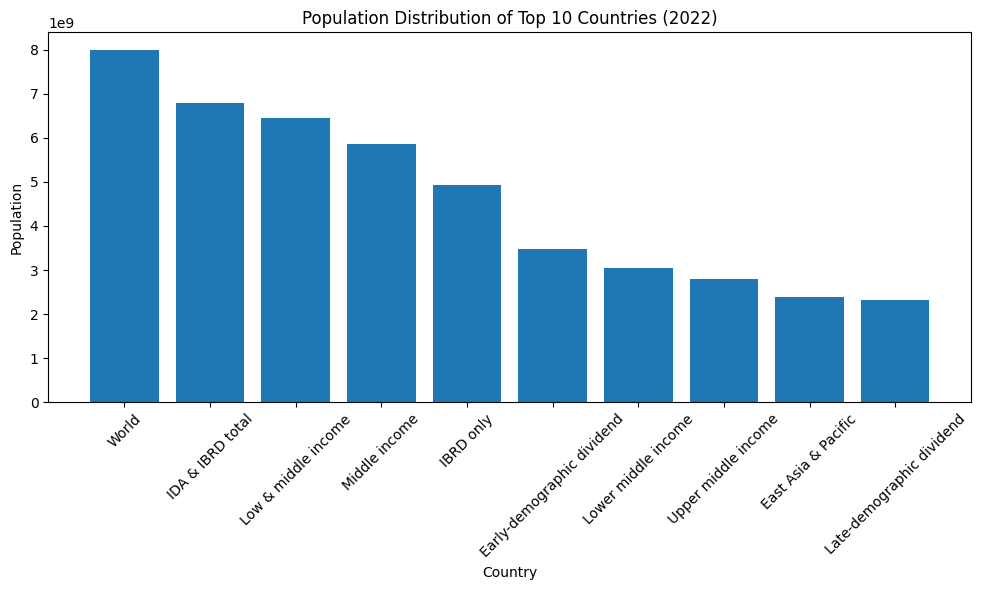

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(top10_countries['Country Name'], top10_countries['2022'])
plt.title('Population Distribution of Top 10 Countries (2022)')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


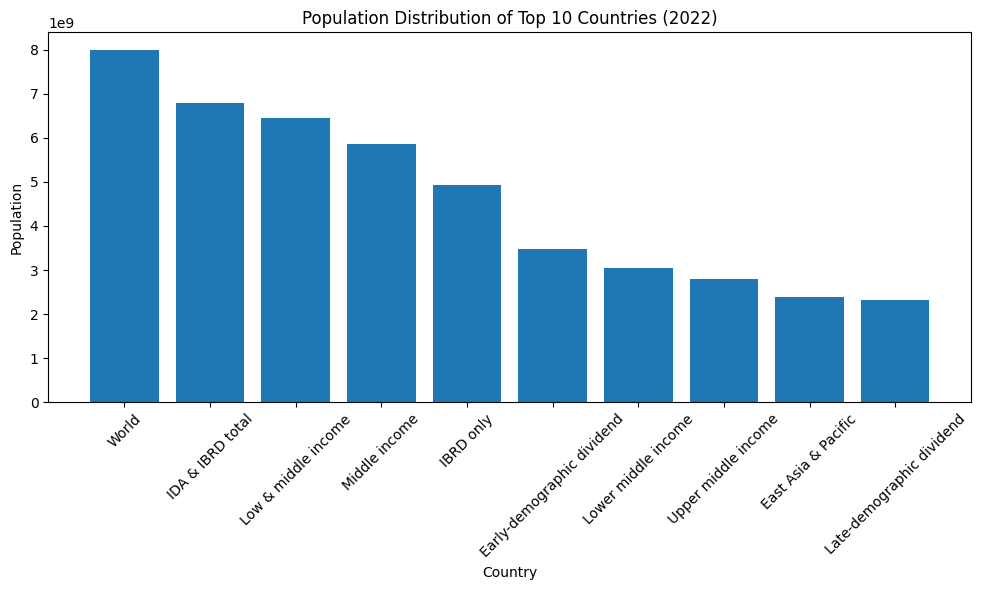

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(top10_countries['Country Name'], top10_countries['2022'])
plt.title('Population Distribution of Top 10 Countries (2022)')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('population_distribution_top10_2022.png')
plt.show()


## Conclusion
This visualization represents the distribution of population across
the top 10 most populous countries in 2022. Bar charts are effective
for comparing categorical data and provide clear insights into
population distribution.
